# Лабораторная работа №1

**Студент:** Гаптулхаков Р.Р.

**Группа:** М8О-408Б-19

Загрузим необходимые библиотеки.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим предобработанные данные из нулевой лабораторной.

In [ ]:
train_df = pd.read_csv("train_processed.csv")
test_df = pd.read_csv("test_processed.csv")

In [ ]:
train_df.drop("Unnamed: 0", axis=1, inplace=True)
test_df.drop("Unnamed: 0", axis=1, inplace=True)
None

In [ ]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Destination,encoded_Transported
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,2,0
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,2,1
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,2,0
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,2,0
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,2,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CryoSleep            8693 non-null   int64  
 1   Age                  8693 non-null   float64
 2   VIP                  8693 non-null   int64  
 3   RoomService          8693 non-null   float64
 4   FoodCourt            8693 non-null   float64
 5   ShoppingMall         8693 non-null   float64
 6   Spa                  8693 non-null   float64
 7   VRDeck               8693 non-null   float64
 8   encoded_HomePlanet   8693 non-null   int64  
 9   encoded_Destination  8693 non-null   int64  
 10  encoded_Transported  8693 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 747.2 KB


In [ ]:
Y = train_df['encoded_Transported'].to_numpy()
X = train_df.drop('encoded_Transported', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Destination
3032,0,43.0,0,0.000000,4.830108,0.000000,0.379329,0.621556,1,2
7757,1,23.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,2
1795,0,46.0,0,0.055839,2.186965,0.000000,0.022313,0.372933,0,2
1702,0,33.0,0,0.000000,2.559286,0.034054,0.008925,0.124311,0,2
6634,0,24.0,0,0.000000,0.194546,2.630683,0.000000,0.169892,0,0


In [ ]:
X_train = X_train.to_numpy()
X_val = X_val.to_numpy() 

In [ ]:
X_train[0]

array([ 0.        , 43.        ,  0.        ,  0.        ,  4.83010767,
        0.        ,  0.37932881,  0.62155555,  1.        ,  2.        ])

In [ ]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

## KNN

In [ ]:
from sklearn.metrics import euclidean_distances
class KNNClassifier(ClassifierMixin, BaseEstimator):
    def __init__(self, nb=5):
        self.nb = nb

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        y = np.ndarray((X.shape[0],))
        for i, elem in enumerate(X):
            distances = euclidean_distances([elem], self.X_)[0]
            neighbors = np.argpartition(distances, kth = self.nb- 1)
            k_neighbors = neighbors[:self.nb]
            labels, cnts = np.unique(self.y_[k_neighbors], return_counts = True)
            y[i] = labels[cnts.argmax()]
        return y


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7611196319018405


In [ ]:
my_clf = KNNClassifier(nb=5)
my_clf.fit(X_train, y_train)
y_pred = my_clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.763420245398773


## Logistic Regression

In [ ]:
class LogisticRegressionClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.05, max_iters=2500, fit_intercept=True):
        self.fit_intercept = fit_intercept        
        self.lr = lr        
        self.max_iters = max_iters
             
    def fit( self, X, Y ):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros(self.n)              
        self.X = X        
        self.Y = Y
        # gradient descent learning
        for i in range(self.max_iters):            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
    def update_weights(self):
        z = self.X.dot(self.W)
        
        # sigmoid        
        a = 1 / (1 + np.exp(-z))
        
        # calculate gradients        
        grad = (a - self.Y.T)        
        grad = np.reshape(grad, self.m)        
        dW = np.dot(self.X.T, grad) / self.m         
        db = np.sum(grad) / self.m 
        
        # update weights    
        self.W = self.W - self.lr * dW    
          
        return self
      
    def predict(self, X) :
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        z = X.dot(self.W)
        z = 1 / ( 1 + np.exp(-z))        
        y = np.where(z > 0.5, 1, 0)        
        return y

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7733895705521472


In [ ]:
my_clf = LogisticRegressionClassifier()
my_clf.fit(X_train, y_train)
y_pred = my_clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6848159509202454


## SVM

In [ ]:
class SVMClassifier(ClassifierMixin, BaseEstimator):
    def __init__(self, epoches = 200, lr = 0.005, alpha = 0.01, fit_intercept=True):
        self.epoches = epoches
        self.lr =  lr
        self.alpha = alpha
        self.fit_intercept = fit_intercept

    
    def update_weights(self):
        z = np.dot(self.X, self.W)
        dz = self.alpha * self.W
        for i, z_i in enumerate(z):
            if z_i * self.Y[i] < 1:
                dz -= self.X[i] * self.Y[i]
        self.W -= self.lr * dz

    def fit(self, X, y):
        #bias
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.m, self.n = X.shape        
        
        # weight initialization              
        self.X = X
        self.Y = y
        self.W = np.zeros(self.n)

        for _ in range(self.epoches):
            self.update_weights() 
        return self

    def predict(self, X):
        #bias
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        return np.sign(np.dot(X, self.W))
    

In [ ]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7699386503067485


In [ ]:
clf = LinearSVC(random_state=0, tol=1e-05)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6779141104294478


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
my_clf = SVMClassifier()
my_clf.fit(X_train, np.where(y_train > 0, 1, -1))
y_pred = my_clf.predict(X_val)
y_pred = np.where(y_pred > 0, 1, 0)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6123466257668712


## NaiveBayes

In [ ]:
import math
class NaiveBayesClassifier(ClassifierMixin, BaseEstimator):
    def __init__(self):
       pass
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        labels, counts = np.unique(self.y, return_counts = True)
        self.labels = labels
        self.freq = np.array([i / self.y.shape[0] for i in counts])
        self.means = np.array([self.X[self.y == i].mean(axis = 0) for i in labels])
        self.stds = np.array([self.X[self.y == i].std(axis = 0) for i in labels])
        return self

    def gaussian(self, mu, sigma, x0):
        return np.exp(-(x0 - mu) ** 2 / (2 * sigma)) / np.sqrt(2.0 * math.pi * sigma)
    
    def predict(self, X):        
        res = np.zeros(X.shape[0])
        for i, x_i  in enumerate(X):
            freq = np.array(self.freq)
            for j, label_j in enumerate(self.labels):
                p_x_cond_y = np.array([self.gaussian(self.means[j][k], self.stds[j][k], x_i[k]) for k in range(X.shape[1])])
                freq[j] *= np.prod(p_x_cond_y)
            res[i] = np.argmax(freq)
        return res

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6932515337423313


In [ ]:
my_clf = NaiveBayesClassifier()
my_clf.fit(X_train, y_train)
y_pred = my_clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7312116564417178


##  Подбор параметов

Будем использовать Pipeline и GridSearchCV для поиска оптимальных параметров.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, RocCurveDisplay, ConfusionMatrixDisplay

def scores(y_pred1, y_pred2, y):
    print("Accuracy:", accuracy_score(y, y_pred1))
    print("Accuracy sklearn model:", accuracy_score(y, y_pred2))
    print("Recall:", recall_score(y, y_pred1))
    print("Recall sklearn model:", accuracy_score(y, y_pred2))
    print("Precision:", precision_score(y, y_pred2))
    print("Precision sklearn model:", accuracy_score(y, y_pred2))
    figure = plt.figure(figsize = (20, 5))
    matr1 = confusion_matrix(y, y_pred1)
    matr2 = confusion_matrix(y, y_pred2)
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    ax1.set_title("My implementation")
    ax2.set_title("Scikit-learn implementation")
    ConfusionMatrixDisplay(matr1).plot(ax = ax1)
    ConfusionMatrixDisplay(matr2).plot(ax = ax2)
    plt.show()

### KNN

In [ ]:
clf = GridSearchCV(Pipeline([("KNN", KNNClassifier(nb=5))]),
                    {"KNN__nb" : [7, 5, 3, 1]})

clf.fit(X_train, y_train)
y_pred1 = clf.best_estimator_.predict(X_val)
print("Лучшие гиперпараметры модели:", clf.best_params_)
print("Лучший счёт модели:", clf.best_score_)

Лучшие гиперпараметры модели: {'KNN__nb': 7}
Лучший счёт модели: 0.7682826622843056


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_val)

Accuracy: 0.7630368098159509
Accuracy sklearn model: 0.7611196319018405
Recall: 0.7968157695223654
Recall sklearn model: 0.7611196319018405
Precision: 0.6712860310421286
Precision sklearn model: 0.7611196319018405


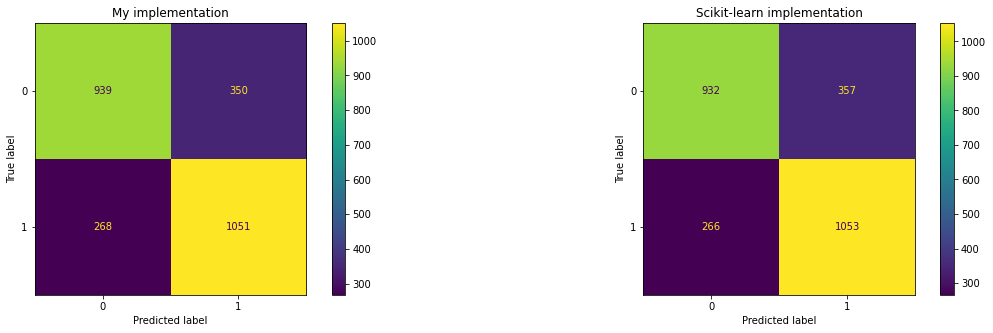

In [ ]:
scores(y_pred1, y_pred2, y_val)

In [ ]:
with open('KNN.pickle', 'wb') as f:
    pickle.dump(clf.best_params_, f)

### Logistic Regression

In [ ]:
clf = GridSearchCV(Pipeline([("LogReg",LogisticRegressionClassifier())]),
                    {"LogReg__lr" : [0.01, 0.005, 0.001],
                     "LogReg__max_iters" : [100, 200, 500, 2000],
                     "LogReg__fit_intercept" : [True, False]})

clf.fit(X_train, y_train)
y_pred1 = clf.best_estimator_.predict(X_val)
print("Лучшие гиперпараметры модели:", clf.best_params_)
print("Лучший счёт модели:", clf.best_score_)

Лучшие гиперпараметры модели: {'LogReg__fit_intercept': True, 'LogReg__lr': 0.01, 'LogReg__max_iters': 2000}
Лучший счёт модели: 0.790797041906327


In [ ]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_val)

Accuracy: 0.7829754601226994
Accuracy sklearn model: 0.7733895705521472
Recall: 0.8506444275966641
Recall sklearn model: 0.7733895705521472
Precision: 0.6712860310421286
Precision sklearn model: 0.7733895705521472


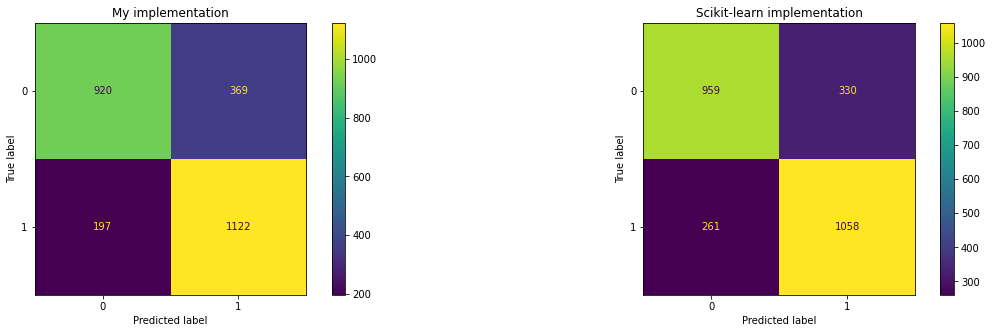

In [ ]:
scores(y_pred1, y_pred2, y_val)

In [ ]:
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(clf.best_params_, f)

### SVM

In [ ]:
clf = GridSearchCV(Pipeline([("SVM", SVMClassifier())]),
                    {"SVM__epoches" : [10, 50, 100],
                     "SVM__lr" : [0.01, 0.05, 0.0001],
                     "SVM__alpha" : [2.0, 1.0, 0.1, 0.01, 0.0]})

clf.fit(X_train, np.where(y_train > 0, 1, -1))
y_pred1 = clf.best_estimator_.predict(X_val)
y_pred1 = np.where(y_pred1 > 0, 1, 0)
print("Лучшие гиперпараметры модели:", clf.best_params_)
print("Лучший счёт модели:", clf.best_score_)

Лучшие гиперпараметры модели: {'SVM__alpha': 1.0, 'SVM__epoches': 100, 'SVM__lr': 0.0001}
Лучший счёт модели: 0.6133114215283484


In [ ]:
model = LinearSVC(random_state=0, tol=1e-05)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy: 0.6529907975460123
Accuracy sklearn model: 0.6779141104294478
Recall: 0.9552691432903715
Recall sklearn model: 0.6779141104294478
Precision: 0.6199298948422634
Precision sklearn model: 0.6779141104294478


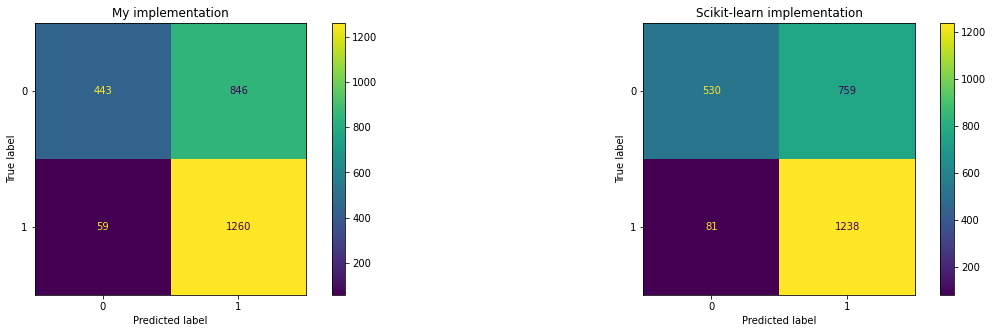

In [ ]:
scores(y_pred1, y_pred2, y_val)

In [ ]:
class MySVM(ClassifierMixin, BaseEstimator):
    def __init__(self, epochs=10, lr=0.1, alpha=0.1):
        self.w = None
        self.epochs = epochs
        self.lr = lr
        self.alpha = alpha  # regularization parameter
    
    def fit(self, X, y):
        y = np.where(y == 1, 1, -1)
        n, k = X.shape
        
        if self.w is None:
            np.random.seed(0xDEAD)
            # weights
            self.w = np.random.randn(k + 1)
 
        X = np.concatenate((np.ones((n, 1)), X), axis=1)  # add bias as feature
        for i in range(self.epochs):
            for j, x in enumerate(X):
                margin = y[j] * np.dot(self.w, x)
                if margin >= 1:
                    self.w -= self.lr * self.alpha * self.w / self.epochs
                else:
                    self.w += self.lr * (y[j] * x - self.alpha * self.w / self.epochs)
        return self
    
    def predict(self, X):
        # no predict proba here
        n, k = X.shape
        X = np.concatenate((np.ones((n, 1)), X), axis=1)
        y = np.ndarray((n))
        
        for i, elem in enumerate(X):
            prediction = np.dot(self.w, elem)
            if prediction > 0:
                y[i] = 1
            else:
                y[i] = 0
        return y
    
    
    def _hinge_loss(self, x, y):
        return max(0, 1 - y * np.dot(x, self.w))
    
    
    def _soft_margin_loss(self, x, y):
        return self._hinge_loss(x, y) + self.alpha * np.dot(self.w, self.w)

In [ ]:
clf = GridSearchCV(Pipeline([("SVM", MySVM())]),
                    {"SVM__epochs" : [10, 50, 100],
                     "SVM__lr" : [0.01, 0.05, 0.0001],
                     "SVM__alpha" : [2.0, 1.0, 0.1, 0.01, 0.0]})

clf.fit(X_train, y_train)
y_pred1 = clf.best_estimator_.predict(X_val)
print("Лучшие гиперпараметры модели:", clf.best_params_)
print("Лучший счёт модели:", clf.best_score_)

In [ ]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred2 = model.predict(X_val)

Accuracy: 0.786042944785276
Accuracy sklearn model: 0.7699386503067485
Recall: 0.844579226686884
Recall sklearn model: 0.7699386503067485
Precision: 0.7738004569687738
Precision sklearn model: 0.7699386503067485


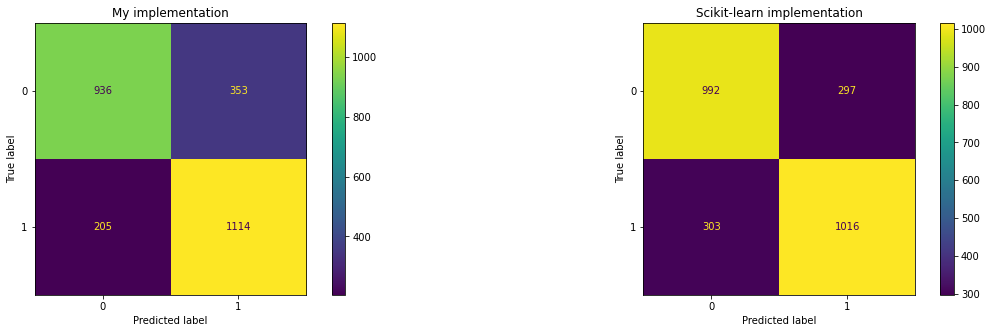

In [ ]:
scores(y_pred1, y_pred2, y_val)

In [ ]:
with open('SVM.pickle', 'wb') as f:
    pickle.dump(clf.best_params_, f)

### NaiveBayesClassifier

In [ ]:
clf = NaiveBayesClassifier()
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_val)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_val)

Accuracy: 0.7312116564417178
Accuracy sklearn model: 0.6932515337423313
Recall: 0.9181197877179682
Recall sklearn model: 0.6932515337423313
Precision: 0.6712860310421286
Precision sklearn model: 0.6932515337423313


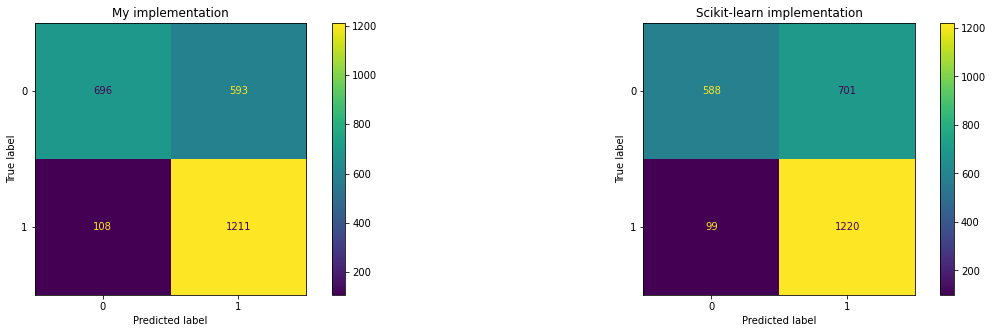

In [ ]:
scores(y_pred1, y_pred2, y_val)

## Решающее дерево

Ради интереса посмотрим, как нашу задачу решит RandomForest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = clf = RandomForestClassifier(max_depth=4, n_estimators=1500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7695552147239264
